In [1]:
### RELATIVE STRENGTH INDICATOR AND VISUALIZER ###
### Also Known as the RSI Indicator

In [7]:
# Management libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# finance libraries
import yfinance as yf

In [8]:
def plotRSI(ticker):
    # Grab our historical data
    Stock = yf.download(ticker, period='5y')
    # Get our closing data series
    stockclose = Stock['Close']
    differ = stockclose.diff(1)
    # Rid of NA values
    stockclose.dropna(inplace=True)
    # Save all the moves that were positive and negative in separate variables
    positive = differ.copy()
    negative = differ.copy()
    # Remove positive and negative data from dataframes in prep for RSI calculation
    positive[positive < 0] = 0
    negative[negative > 0] = 0
    # Our time window
    days = 14
    # Calculate our average gain and loss for trailing window
    avgain = positive.rolling(window=days).mean().dropna()
    avloss = abs(negative.rolling(window=days).mean().dropna())
    # RSI calculation
    relative_strength = (avgain / avloss)
    RSI = (100 - (100 / (1 + relative_strength)))
    # Create our combined dataframe
    combined = pd.DataFrame()
    combined['Close'] = Stock['Close']
    combined['RSI'] = RSI
    
    ########### ploting ###########
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(211)
    ax1.plot(combined.index, combined['Close'], color='lightgray')
    ax1.grid(True, color='#555555')
    ax1.set_title('{} Stock Price'.format(ticker), color='white')
    ax1.set_axisbelow(True)
    ax1.set_facecolor('black')
    ax1.figure.set_facecolor('#121212')
    ax1.tick_params(axis='x', color='white')
    ax1.tick_params(axis='y', color='white')

    ax2 = plt.subplot(212, sharex=ax1)
    ax2.plot(combined.index, combined['RSI'], color='lightgray')

    ### Creating the boiler lines on the graph
    ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')
    ax2.axhline(10, linestyle='--', alpha=0.5, color='#ffaa00')
    ax2.axhline(20, linestyle='--', alpha=0.5, color='#ffaa00')
    ax2.axhline(30, linestyle='--', alpha=0.5, color='#cccccc')
    ax2.axhline(70, linestyle='--', alpha=0.5, color='#cccccc')
    ax2.axhline(80, linestyle='--', alpha=0.5, color='#00ff00')
    ax2.axhline(90, linestyle='--', alpha=0.5, color='#00ff00')
    ax2.axhline(100, linestyle='--', alpha=0.5, color='#ffaa00')

    ax2.set_title('RSI Value of {} stock'.format(ticker), color='white')
    ax2.grid(False, color='#555555')
    ax2.set_axisbelow(True)
    ax2.set_facecolor('black')
    ax2.figure.set_facecolor('#121212')
    ax2.tick_params(axis='x', color='white')
    ax2.tick_params(axis='y', color='white')
    
    plt.show()

    return combined['RSI'].iloc[[-1]]

[*********************100%***********************]  1 of 1 completed


<ipython-input-8-b5cfb47e063b>:54: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax2.grid(False, color='#555555')


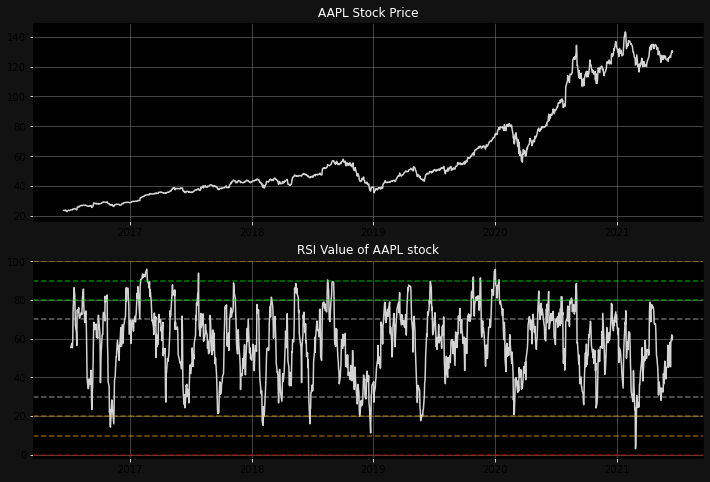

Date
2021-06-16    60.855267
Name: RSI, dtype: float64

In [9]:
plotRSI('AAPL')